<a href="https://colab.research.google.com/github/AliNajafpour/AI-Face-Identifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lfw-dataset


In [3]:
img1 = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg'
img2 = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg'

In [4]:
def preprocess(img, size=(160, 160)):
    img = cv2.imread(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    equalizer = cv2.equalizeHist(blur)

    bgr = cv2.cvtColor(equalizer, cv2.COLOR_GRAY2BGR)
    result = cv2.resize(bgr, size)

    return result

In [5]:
def preprocess_image(image_path, output_path, target_size=(224, 224)):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load {image_path}")
        return

    # Convert to grayscale for preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Contrast enhancement: CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Convert back to BGR for brightness adjustment
    enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

    # Brightness adjustment: Linear scaling
    bright = cv2.convertScaleAbs(enhanced_bgr, alpha=1.2, beta=10)

    # Resize image
    resized = cv2.resize(bright, target_size, interpolation=cv2.INTER_LINEAR)


    print(f"Saved preprocessed image to {output_path}")
    return resized


In [7]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=92f106adc14f181543fe159d4d8ad0d7042bdf8ea7bbf64bd75bcdc3a6eeb6ec
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [26]:
import cv2
import numpy as np
from deepface import DeepFace

def preprocess2(img, size=(160, 160), padding=20):
    image = cv2.imread(img)

    faces = DeepFace.extract_faces(img_path=img, enforce_detection=True)
    facial_area = faces[0]["facial_area"]

    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    height, width = image.shape[:2]

    x1 = max(0, x - padding)
    y1 = max(0, y - padding)
    x2 = min(width, x + w + padding)
    y2 = min(height, y + h + padding)

    face_img = image[y1:y2, x1:x2]
    gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))


    enhanced = clahe.apply(gray)
    # blur = cv2.GaussianBlur(enhanced, (5, 5), 0)
    equalizer = cv2.equalizeHist(enhanced)
    enhanced_bgr = cv2.cvtColor(equalizer, cv2.COLOR_GRAY2BGR)

    bright = cv2.convertScaleAbs(enhanced_bgr, alpha=1.2, beta=10)
    result = cv2.resize(bright, size, interpolation=cv2.INTER_LINEAR)

    return result

array([[[10, 10, 10],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 7,  7,  7],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 6,  6,  6],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
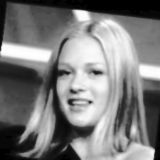

In [9]:
out1_1 = preprocess(img1)
out1_1

Saved preprocessed image to 


array([[[21, 21, 21],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[16, 16, 16],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [24, 24, 24],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
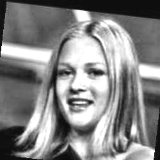

In [10]:
out1_2 = preprocess_image(img1,'', (160, 160))
out1_2

array([[[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 45,  45,  45],
        [ 39,  39,  39],
        [ 35,  35,  35]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 57,  57,  57],
        [ 45,  45,  45],
        [ 38,  38,  38]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 78,  78,  78],
        [ 57,  57,  57],
        [ 41,  41,  41]],

       ...,

       [[169, 169, 169],
        [172, 172, 172],
        [167, 167, 167],
        ...,
        [ 39,  39,  39],
        [ 41,  41,  41],
        [ 39,  39,  39]],

       [[165, 165, 165],
        [157, 157, 157],
        [132, 132, 132],
        ...,
        [ 44,  44,  44],
        [ 44,  44,  44],
        [ 41,  41,  41]],

       [[154, 154, 154],
        [129, 129, 129],
        [ 91,  91,  91],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]]], dtype=uint8)
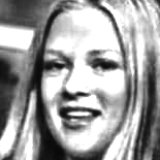

In [28]:
out1_3 = preprocess2(img1)
out1_3

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
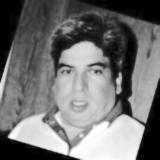

In [12]:
out2_1 = preprocess(img2)
out2_1

Saved preprocessed image to 


array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
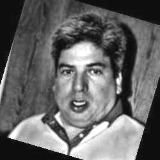

In [13]:
out2_2 = preprocess_image(img2,'', (160, 160))
out2_2

array([[[ 75,  75,  75],
        [ 75,  75,  75],
        [ 80,  80,  80],
        ...,
        [ 22,  22,  22],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 85,  85,  85],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21]],

       [[ 98,  98,  98],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 25,  25,  25],
        [ 21,  21,  21],
        [ 21,  21,  21]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
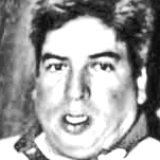

In [27]:
out2_3 = preprocess2(img2,)
out2_3